In [1]:
# You can import *ANYTHING* you want here.
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

from sklearn.metrics import accuracy_score
import pandas as pd
from tqdm import tqdm # this is just a tool to show a progress bar as your simulations are running

# Assignment Week 08: Nested Spheres

Simulation is an incredibly useful tool in data science.  We can use simulation to evaluate how algorithms perform against ground truth, and how algorithms compare to one another.

In this assignment, you will be implementing and extending the nested spheres simulation study found in *Elements of Statistical Learning* page 339. https://web.stanford.edu/~hastie/ElemStatLearn/

# Nested Spheres

Consider a dataset which contains 10 features $X_1 \,, X_2 \,, \cdots \,, X_{10}$.  The features are standard independent Gaussian random variables.  That is to say

$$ X_j \sim \operatorname{Normal}(0,1) \quad \forall j = 1 \dots 10$$

We are going to use these features to study a classification problem.  You will have to create the target variable, $Y$ by computing the following rule:

$$ Y = \begin{cases}  1 \quad \mbox{ if } \sum_{j=1}^{10} X^2_j>9.34 \\ 0 \quad  \mbox{else} \end{cases}$$

# The Simulation Study

Follow these steps to complete the assignment. 

### Part 1 ( X / 25 pts )
Write a function, `generate_data`, that takes a dataset size N and creates a dataset according to the rule above, returning the feature matrix `X` and the labels `y`.

In [3]:
def generate_data(N):
    # Create feature matrix X and labels y
    #np.random.seed(2)
    #X = np.random.uniform (0,1, size = (N,10))
    X = np.random.normal(0,1, size = (N,10))
    #X = np.linspace(0,1,21).reshape(-1,1)
    #y = np.floor(np.sum(X**2, axis = 1)/9.34)
    #could use np.floor above instead of all the for loops below
    #but both work the same so it doesn't matter
    
    z = np.sum(X**2, axis = 1)
    y = np.empty(N)
    
    for i in range(N):   
        if z[i] > 9.34:
             y[i] = 1
        else:
             y[i] = 0
        
    return X,y

x,y = generate_data(10)
print(x)
print(y)

[[-0.70730307  0.9694176  -0.20647904  0.56132476  1.39237604 -2.2354558
  -1.03312245 -0.08285727 -0.18327725  0.12812399]
 [-0.27916304 -0.31850482 -0.23206825  0.11952038  0.781421    0.04899866
  -2.48074299 -0.71198162 -0.82059634 -1.32801771]
 [ 1.15038176 -1.07667853  0.64132769  0.3096465   2.06252642  0.95656469
  -1.01915446  1.55871102  0.67660432 -1.14739539]
 [-0.95199441  1.02427113  1.11146244  1.02528326  2.02242597  0.46980942
  -1.76815215  1.47484306 -0.95997688 -0.94656403]
 [ 0.05607037  0.51626717  0.54564267  0.26702548 -1.5630084   0.56419491
   0.08319851 -0.60260351  1.33163242  0.62556434]
 [-0.64377531 -0.92010718 -0.90178962 -0.47743302 -0.42646407 -0.68586741
  -0.34510131 -0.24565798 -0.23083251  0.68989671]
 [ 1.65655409 -0.02367007 -0.10525292 -0.83398002  0.5335897  -0.63811772
   0.6551429  -1.15394957  0.43864406 -0.24419574]
 [-0.20942504  1.81776256  0.8185157   2.05244202 -1.4154029  -0.38712779
   1.60035302  0.0099609   0.43859302  1.16078112]
 

## Part 2 ( X / 25 pts )

Write a function `run_simulation` that accepts two numbers, Ntrain and Ntest. It should generate a training set and testing set using your `generate_data` function and then train **four classifiers**. The first should be a bagged decision tree, the second should be a random forest with `max_features=1`, the third should be a random forest with `max_features=3`, and the fourth can be anything you like, for example a random forest with more features or an XGboost model. Use 500 trees in your random forests and the bagged classifier. The function should return the accuracy for each of these models estimated using the training set you generated.

In [4]:
def run_simulation(Ntrain,Ntest):
    # Code to generate data and run one simulation
    xtrain, ytrain = generate_data(Ntrain)
    xtest, ytest = generate_data(Ntest)
    
    #bagged decision tree classifier
    tree = DecisionTreeClassifier(max_depth = 5)
    bag = BaggingClassifier(base_estimator= tree, n_estimators=500,random_state=0, n_jobs = -1).fit(xtrain, ytrain)
  
    #random forest classifiers
    rf1 = RandomForestClassifier(n_estimators= 500, min_samples_leaf= 0.001, max_features= 1, min_impurity_decrease= 0.0001, oob_score= True, random_state= 0).fit(xtrain, ytrain)
    rf3 = RandomForestClassifier(n_estimators= 500, min_samples_leaf= 0.001, max_features= 3, min_impurity_decrease= 0.0001, oob_score= True, random_state= 0).fit(xtrain, ytrain)
    rf5 = RandomForestClassifier(n_estimators= 500, min_samples_leaf= 0.001, max_features= 5, min_impurity_decrease= 0.0001, oob_score= True, random_state= 0).fit(xtrain, ytrain)
    
    #XGboost classifier
    #xgboost = 
    
    #predict from classifiers
    ypred_bag = bag.predict(xtest)
    ypred_rf1 = rf1.predict(xtest)
    ypred_rf3 = rf3.predict(xtest)
    ypred_rf5 = rf5.predict(xtest)
    #ypred_boost = xgboost.predict(xtest)
    
    #calculate accuracy of all classifier
    bag_accuracy = accuracy_score(ytest, ypred_bag)
    rf_mf1_accuracy = accuracy_score(ytest, ypred_rf1)
    rf_mf3_accuracy = accuracy_score(ytest, ypred_rf3)
    my_classifier_accuracy = accuracy_score(ytest, ypred_rf5)
    #my_classifier_accuracy = accuracy_score(ytest, ypred_boost)
    
    return bag_accuracy, rf_mf1_accuracy, rf_mf3_accuracy, my_classifier_accuracy

bag_accuracy, rf_mf1_accuracy, rf_mf3_accuracy, my_classifier_accuracy = run_simulation(1000,5000)

print (bag_accuracy)
print (rf_mf1_accuracy)
print (rf_mf3_accuracy)
print (my_classifier_accuracy)


0.7512
0.8712
0.8578
0.8536


## Part 3 ( X / 25 pts )

Run 50 simulations using a training set of size 1000 and a test set of size 5000 and record all the results in four vectors, one for each type of model. *You should probably debug your code using smaller training and test set sized first because these will take a while. The full simulation takes 10 minutes on my old 2.8GHz core i5 laptop.*

In [5]:
#Setup code to record results here:
Nsim = 50
results = np.empty(shape = (Nsim,4))

#Loop to run simulations:
for sim in tqdm(range(Nsim)):
    # Run simulations, collect data
    results[sim,:] = run_simulation(1000,5000)
    
print(results)
    

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [19:37<00:00, 23.56s/it]

[[0.745  0.8552 0.8398 0.8324]
 [0.7668 0.8736 0.8556 0.8468]
 [0.736  0.8578 0.8484 0.8442]
 [0.7482 0.879  0.8578 0.8532]
 [0.7136 0.8512 0.8284 0.824 ]
 [0.7276 0.8768 0.8602 0.8554]
 [0.7388 0.872  0.8508 0.8422]
 [0.7002 0.8628 0.8404 0.8344]
 [0.735  0.8548 0.835  0.8278]
 [0.6978 0.8472 0.819  0.8074]
 [0.7106 0.8722 0.8526 0.8424]
 [0.705  0.8656 0.8436 0.838 ]
 [0.7198 0.8696 0.8514 0.8456]
 [0.722  0.8524 0.8402 0.832 ]
 [0.7266 0.8728 0.86   0.8574]
 [0.7044 0.8508 0.8364 0.8256]
 [0.7126 0.8654 0.8572 0.85  ]
 [0.7494 0.8786 0.8594 0.8548]
 [0.7064 0.8376 0.8204 0.8146]
 [0.7418 0.8562 0.8434 0.8422]
 [0.7194 0.883  0.8498 0.848 ]
 [0.7176 0.871  0.8492 0.8348]
 [0.7146 0.8684 0.8476 0.8396]
 [0.7416 0.8774 0.8648 0.8568]
 [0.7244 0.856  0.8446 0.8398]
 [0.7132 0.8566 0.846  0.8374]
 [0.7154 0.8634 0.8414 0.8352]
 [0.7382 0.8694 0.858  0.8496]
 [0.803  0.8818 0.8698 0.8612]
 [0.7838 0.8716 0.8568 0.8496]
 [0.7262 0.8646 0.842  0.828 ]
 [0.7376 0.8868 0.8614 0.855 ]
 [0.6918

## Part 4 (X / 25 pts) 
Plot the error rates for each model using a boxplot for each one. The four models should be across the x-axis, and the y-axis should be accuracy.

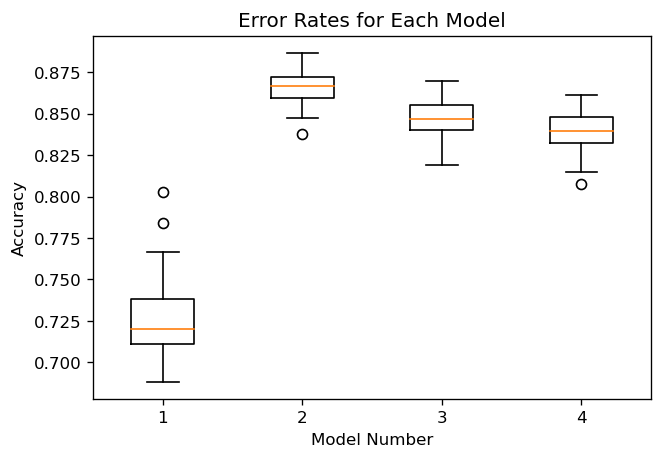

In [6]:
#Plot the error rates as a box plot by model to complete the assignment.

# Multiple box plots on one Axes
fig, ax = plt.subplots(dpi=120)
data = [results[:,0],results[:,1], results[:,2], results[:,3]]
ax.boxplot(data)

plt.xlabel("Model Number") #x axis label
plt.ylabel("Accuracy") #y axis label
plt.title('Error Rates for Each Model') #adding a title to the plot

plt.show()
